In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [25]:
import pandas as pd
import numpy as np

train = pd.read_csv('./processing-data/train_with_tokens.csv')
test = pd.read_csv('./processing-data/test_with_tokens.csv')

# Turn labels into integers
train['label'] = train['label'].astype('category').cat.codes
test['label'] = test['label'].astype('category').cat.codes

In [26]:
train.head()

,label,comment,nonsw,tokens
0,2,sợ lém sợ lém,sợ lém sợ lém,sợ lém sợ lém
1,2,mỗi lần thấy ảnh gia đình lại không cầm được n...,ảnh gia đình cầm mắt,ảnh gia_đình cầm mắt
2,2,thực sự thì áp lực mình nhận nhiều nhất không ...,áp lực mẹ crush lớp siu xinh đầu cực kỳ ham lo...,áp_lực mẹ crush lớp siu xinh_đầu cực_kỳ ham lo...
3,2,hay mà coii buồn quaaaa ạ,hay coii buồn quaaaa,hay coii buồn quaaaa
4,2,để chuyển đổi từ giây sang năm chúng ta cần sử...,đổi giây phép phút giây phút nhuận phút giây p...,đổi giây_phép phút_giây phút_nhuận phút giây_p...


In [27]:
X_train = train['tokens']
y_train = train['label']
X_test = test['tokens']
y_test = test['label']

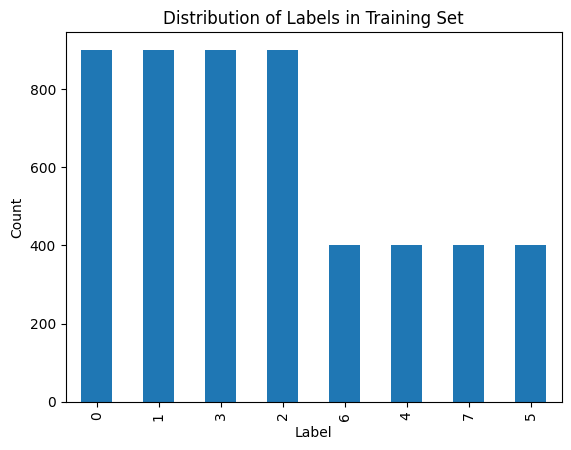

In [28]:
# PLot the distribution of labels
import matplotlib.pyplot as plt
train['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [29]:
# Print the number of samples by label
print("Number of samples by label in training set:")
print(train['label'].value_counts())

Number of samples by label in training set:
label
0    900
1    900
3    900
2    899
6    400
4    400
7    400
5    400
Name: count, dtype: int64


In [36]:
# Resampling the training set to balance the classes of 400 each
from sklearn.utils import resample
train_balanced = pd.DataFrame()
for label in train['label'].unique():
    label_data = train[train['label'] == label]
    resampled_data = resample(label_data, replace=True, n_samples=400, random_state=42)
    train_balanced = pd.concat([train_balanced, resampled_data])
print("Number of samples by label in balanced training set:")
print(train_balanced['label'].value_counts())

X_train_balanced = train_balanced['tokens']
y_train_balanced = train_balanced['label']

Number of samples by label in balanced training set:
label
2    400
0    400
6    400
1    400
4    400
3    400
7    400
5    400
Name: count, dtype: int64


In [37]:
pipeline.fit(X_train_balanced, y_train_balanced)
predictions = pipeline.predict(X_test)

In [38]:
def load_labels(path: str) -> list:
    """
    Load labels from txt file and return as a list
    """
    with open(path, 'r') as file:
        labels = file.readlines()
    labels = [label.strip().split()[1] for label in labels]
    return labels

labels = load_labels('../artifacts/emotions.txt')
labels

['NEUTRAL', 'HAPPY', 'SAD', 'ANGRY', 'SUPRISED', 'SCARED', 'CURIOUS', 'BORING']

              precision    recall  f1-score   support

           0       0.29      0.30      0.30       100
           1       0.44      0.49      0.46       100
           2       0.35      0.42      0.38       100
           3       0.42      0.32      0.36       100
           4       0.52      0.48      0.50       100
           5       0.60      0.72      0.65       100
           6       0.38      0.33      0.35       100
           7       0.53      0.49      0.51       100

    accuracy                           0.44       800
   macro avg       0.44      0.44      0.44       800
weighted avg       0.44      0.44      0.44       800

Accuracy: 0.44375


Text(0.5, 1.0, 'Confusion Matrix')

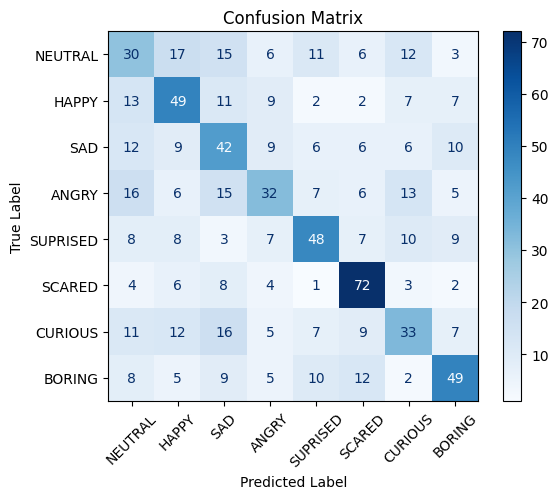

In [39]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

# Plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, cmap=plt.cm.Blues)
# Turn labels into strings
cm.ax_.set_xticklabels(labels, rotation=45)
cm.ax_.set_yticklabels(labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

Try oversampling

In [40]:
# Oversampling the classes to 1000 each
train_balanced_1000 = pd.DataFrame()
for label in train['label'].unique():
    label_data = train[train['label'] == label]
    resampled_data = resample(label_data, replace=True, n_samples=1000, random_state=42)
    train_balanced_1000 = pd.concat([train_balanced_1000, resampled_data])
print("Number of samples by label in balanced training set (1000 each):")
print(train_balanced_1000['label'].value_counts())

Number of samples by label in balanced training set (1000 each):
label
2    1000
0    1000
6    1000
1    1000
4    1000
3    1000
7    1000
5    1000
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.31      0.29      0.30       100
           1       0.49      0.49      0.49       100
           2       0.38      0.41      0.39       100
           3       0.43      0.40      0.42       100
           4       0.53      0.48      0.50       100
           5       0.59      0.74      0.65       100
           6       0.44      0.40      0.42       100
           7       0.59      0.57      0.58       100

    accuracy                           0.47       800
   macro avg       0.47      0.47      0.47       800
weighted avg       0.47      0.47      0.47       800



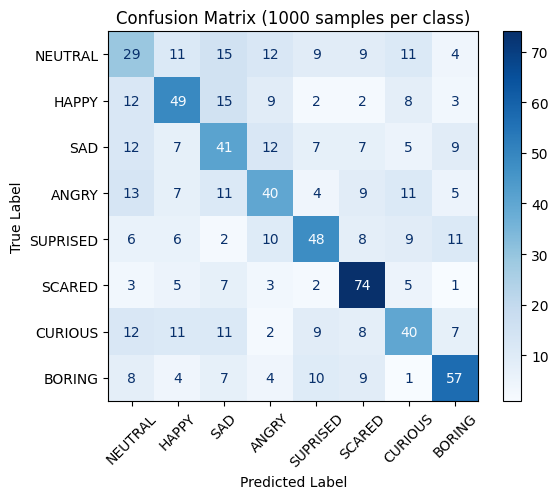

In [ ]:
X_train_balanced_1000 = train_balanced_1000['tokens']
y_train_balanced_1000 = train_balanced_1000['label']
pipeline.fit(X_train_balanced_1000, y_train_balanced_1000)
predictions_1000 = pipeline.predict(X_test)
print(classification_report(y_test, predictions_1000))
cm_1000 = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, cmap=plt.cm.Blues)
cm_1000.ax_.set_xticklabels(labels, rotation=45)
cm_1000.ax_.set_yticklabels(labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (1000 samples per class)')
plt.show()

In [43]:
# Save the model
import joblib
joblib.dump(pipeline, '../artifacts/naive_bayes_model.pkl')

['../artifacts/naive_bayes_model.pkl']